#              unsupervised machine learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('01_District_wise_crimes_committed_IPC_2001_2012.csv')
df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,20,632,0,7,2,5,0,219,1668,3494


Assumption: You were given various crime datasets that contains all the DISTRICTS in each state and you were asked to provide the below data to the higher authorities for further action.

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# fit and transform the STATE/UT column using the LabelEncoder
df["STATE/UT_encoded"] = le.fit_transform(df["STATE/UT"])

# fit and transform the DISTRICT column using the LabelEncoder
df["DISTRICT_encoded"] = le.fit_transform(df["DISTRICT"])
grouped_state = df[["STATE/UT", "STATE/UT_encoded"]].groupby("STATE/UT").first()
grouped_state

,STATE/UT_encoded
STATE/UT,
A & N ISLANDS,0
ANDHRA PRADESH,1
ARUNACHAL PRADESH,2
ASSAM,3
BIHAR,4
CHANDIGARH,5
CHHATTISGARH,6
D & N HAVELI,7
DAMAN & DIU,8


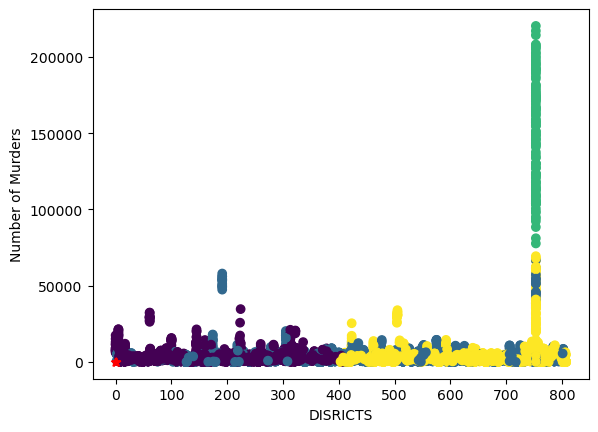

In [25]:
from sklearn.cluster import KMeans

X = df[['STATE/UT_encoded', 'DISTRICT_encoded','TOTAL IPC CRIMES']]
X_scaled = scaler.fit_transform(X)

# Perform k-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

# Visualize clusters and cluster centers
plt.scatter(df['DISTRICT_encoded'], df['TOTAL IPC CRIMES'], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], marker='*', c='red')
plt.xlabel('DISRICTS')
plt.ylabel('Number of Murders')
plt.show()

In [30]:
g1=pd.DataFrame(df.groupby(['DISTRICT'])['TOTAL IPC CRIMES'].sum().reset_index())

In [31]:
g1

,DISTRICT,TOTAL IPC CRIMES
0,24 PARGANAS NORTH,122795
1,24 PARGANAS SOUTH,120912
2,A and N ISLANDS,807
3,ADILABAD,61959
4,AGRA,77987
...,...,...
803,WOKHA,902
804,YADGIRI,4620
805,YAMUNANAGAR,21321
806,YAVATMAL,58921


In [33]:
sensitivearea=g1.head(5)

In [44]:
sensitivearea.max()

DISTRICT              AGRA
TOTAL IPC CRIMES    122795
dtype: object

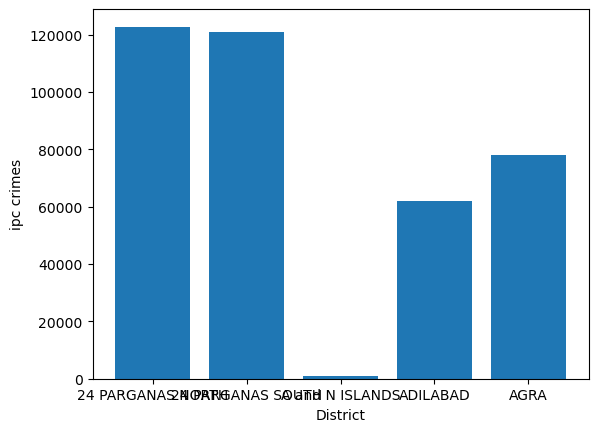

In [45]:
plt.bar(sensitivearea['DISTRICT'],sensitivearea['TOTAL IPC CRIMES'])
plt.xlabel("District")
plt.ylabel("ipc crimes")
plt.show()

In [41]:
peacefularea=g1.tail(5)
peacefularea

,DISTRICT,TOTAL IPC CRIMES
803,WOKHA,902
804,YADGIRI,4620
805,YAMUNANAGAR,21321
806,YAVATMAL,58921
807,ZUNHEBOTO,731


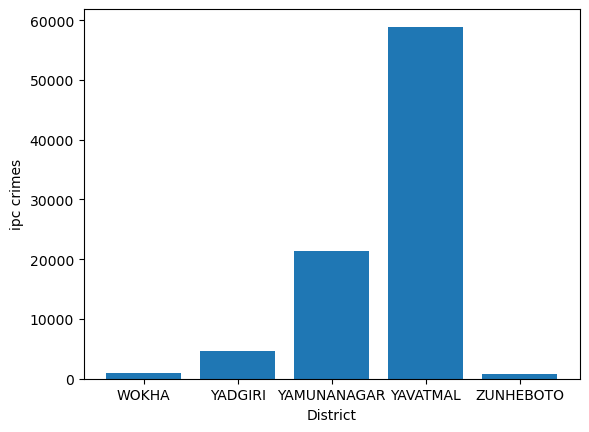

In [42]:
plt.bar(peacefularea['DISTRICT'],peacefularea['TOTAL IPC CRIMES'])
plt.xlabel("District")
plt.ylabel("ipc crimes")
plt.show()

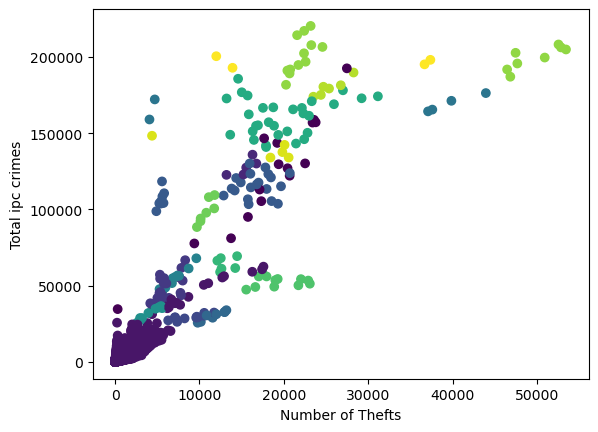

In [53]:
from sklearn.cluster import DBSCAN

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)

# Visualize clusters
plt.scatter(df['THEFT'],df['TOTAL IPC CRIMES'], c=dbscan.labels_)
plt.xlabel('Number of Thefts')
plt.ylabel('Total ipc crimes')
plt.show()

Text(0, 0.5, 'Number of Murders')

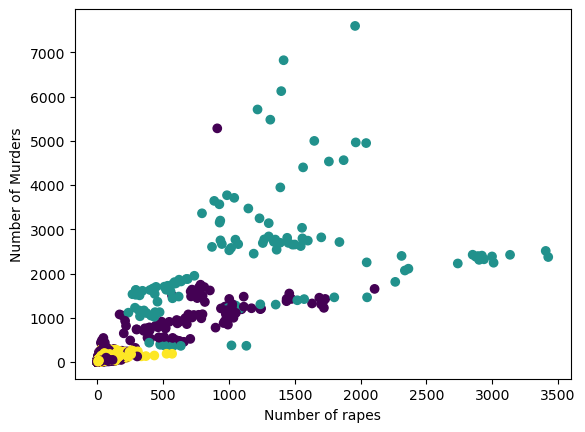

In [50]:
from sklearn.cluster import AgglomerativeClustering

# Perform hierarchical clustering
hier_clust = AgglomerativeClustering(n_clusters=3)
labels = hier_clust.fit_predict(X_scaled)

# Visualize clusters
plt.scatter(df['RAPE'], df['MURDER'], c=labels)
plt.xlabel('Number of rapes')
plt.ylabel('Number of Murders')

With poverty, unemployment isolation some people get into or
pushed into the world of crime but literacy training can provide many youths and adults a chance to build a brighter future.

women need a life free from gender based discrimination to fully participate in social activities. They should be provided with a
safe environment having safe jobs and equal pay, opportunity to
be educated etc. They should be educated and made independent enough that they cannot be made the target of domestic
violence.